In [26]:
import librosa
import os
audio_path = 'C:\\Users\\ASUS\\Desktop\\Learn\\ML\\Project\\audio\\1-5996-A-6.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
librosa.load(audio_path, sr=44100)

import IPython.display as ipd
ipd.Audio(audio_path)

<class 'numpy.ndarray'> <class 'int'>


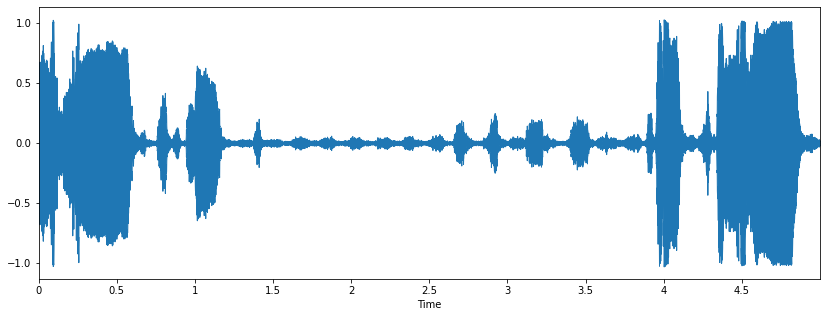

In [27]:
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

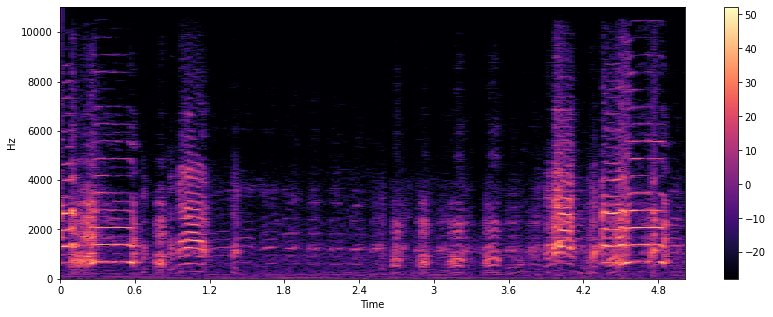

In [28]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz', cmap='magma') 
#If to pring log of frequencies  
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [29]:
import numpy as np
import soundfile
import random
n_fft = 1024
n_mels = 128
win_length = 1024
hop_length = 512
sp_harmonic, sp_percussive = librosa.effects.hpss(x)
soundfile.write('harmonic.wav', sp_harmonic, samplerate=sr)
soundfile.write('percussive.wav', sp_percussive, samplerate=sr)

sp_y = librosa.util.normalize(x, norm=np.inf, axis=None)
sp_harmonic = librosa.util.normalize(sp_harmonic, norm=np.inf, axis=None)
sp_percussive = librosa.util.normalize(sp_percussive, norm=np.inf, axis=None)

inpt = librosa.power_to_db(
    librosa.feature.melspectrogram(y=sp_y, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                    win_length=win_length, n_mels=n_mels))
inpt2 = librosa.power_to_db(
    librosa.feature.melspectrogram(y=sp_harmonic, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                    win_length=win_length, n_mels=n_mels))
inpt3 = librosa.power_to_db(
    librosa.feature.melspectrogram(y=sp_percussive, sr=sr, n_fft=n_fft, hop_length=hop_length,
                                    win_length=win_length, n_mels=n_mels))

print(inpt.shape, inpt2.shape, inpt3.shape)
stack_inpt = np.stack(([inpt], [inpt2], [inpt3]), axis=3)

stack_inpt = librosa.util.normalize(stack_inpt, norm=np.inf, axis=None)
stack_inpt.shape

(128, 216) (128, 216) (128, 216)


(1, 128, 216, 3)

Text(0.5, 1.0, 'Percussive')

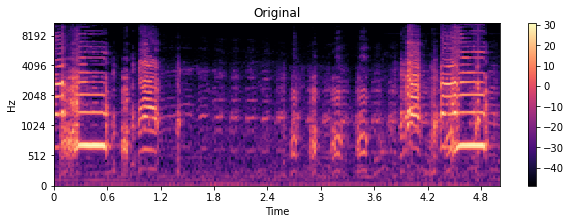

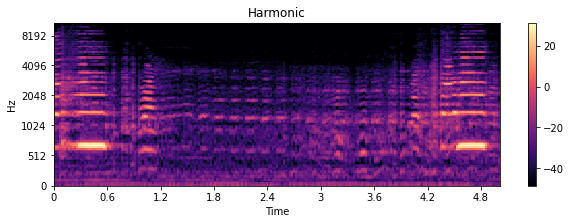

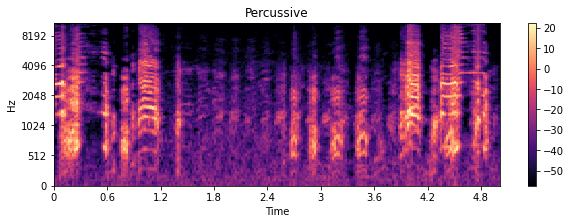

In [46]:
# fig, ax = plt.subplots(nrows=3, ncols=1, sharex=True)
plt.figure(figsize=(10, 3))
img = librosa.display.specshow(inpt, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.title('Original')
plt.colorbar()
fig = plt.figure(figsize=(10, 3))
img1 = librosa.display.specshow(inpt2, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.title('Harmonic')
plt.colorbar()
fig = plt.figure(figsize=(10, 3))
img2 = librosa.display.specshow(inpt3, sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar()
plt.title('Percussive')

1 128 216 3
(128, 216)


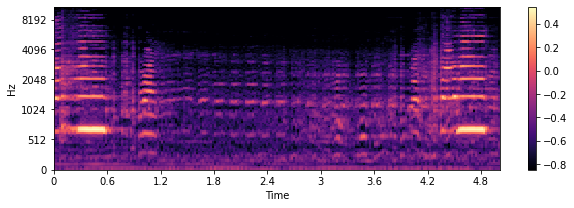

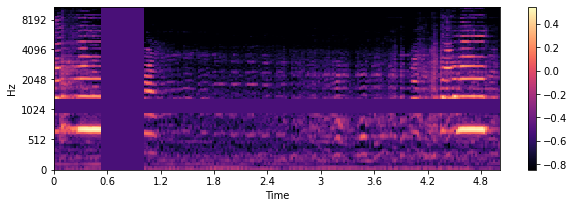

In [47]:
def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
    _, n_mels, n_steps, num = spec.shape
    print(_, n_mels, n_steps, num)
    mask_value = spec[0,:,:,:].mean()
    aug_spec = np.array(spec)
    # aug_spec = spec

    freq_mask_param = int(max_mask_pct * n_mels)
    # print(":", freq_mask_param)
    mask_row = np.ones((1, 1, n_steps, num)) * mask_value
    # print(mask_row)
    for _ in range(n_freq_masks):
        place = int(random.random() * (n_mels - freq_mask_param))
        aug_spec[:, place : place + freq_mask_param, :, :] = mask_row

    time_mask_param = int(max_mask_pct * n_steps)
    mask_column = np.ones((1, n_mels, 1, num)) * mask_value
    for _ in range(n_time_masks):
        # aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
        place = int(random.random() * (n_steps - time_mask_param))
        aug_spec[0, :, place : place + time_mask_param, :] = mask_column

    return aug_spec
plt.figure(figsize=(10, 3))
librosa.display.specshow(stack_inpt[0,:,:,1], sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar()
stack_inpt_aug = spectro_augment(stack_inpt)
print(stack_inpt_aug[0,:,:,0].shape)
plt.figure(figsize=(10, 3))
librosa.display.specshow(stack_inpt_aug[0,:,:,1], sr=sr, x_axis='time', y_axis='mel', cmap='magma')
plt.colorbar()


## Zero Crossing

In [124]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(zero_crossings.shape)
print(sum(zero_crossings))

(110250,)
12339


## Spectral Centroid

(216,)


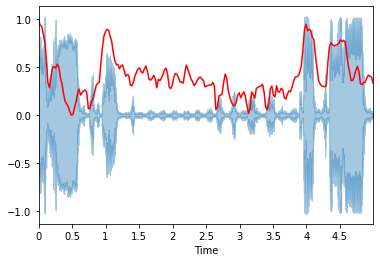

In [125]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
print(spectral_centroids.shape)
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

## Spectral Rolloff

Spectral rolloff is the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

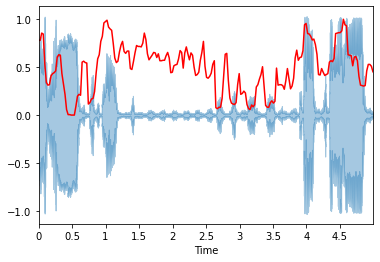

In [126]:
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## MFCC — Mel-Frequency Cepstral Coefficients

(20, 216)


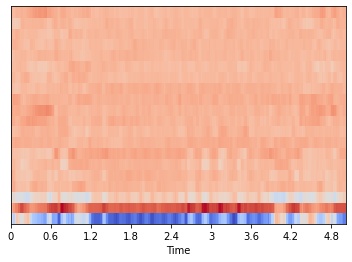

In [127]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')